In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os, sys

sys.path.append(os.path.abspath('..'))
import function

In [60]:
def bins_divide(data, relative_data, bins_num):
    bins_interval = np.linspace(np.min(data) * 0.99, max(data) * 1.01, bins_num + 1)
    bins_center_interval = (bins_interval[:-1] + bins_interval[1:]) / 2

    bins_dis = []
    bins_mean = []
    bins_id_data = np.digitize(data, bins_interval) - 1

    for i in range(0, bins_num):
        index_divide = bins_id_data == i
        bins_dis.append(np.std(relative_data[index_divide]))
        bins_mean.append(np.mean(relative_data[index_divide]))

    return bins_center_interval, bins_mean, bins_dis

In [61]:
band = "C1"
band_short = "g"
band_short_capital = "G"
band_index = 1
day = "240119"
obs_index = "07"
unkonw_index = "01"
exp_time = 300

band = "C2"
band_short = "r"
band_short_capital = "R"
band_index = 2
day = "240119"
obs_index = "08"
unkonw_index = "01"
exp_time = 300

# band = "C3"
# band_short = "i"
# band_short_capital = "I"
# band_index = 3
# day = "240119"
# obs_index = "10"
# unkonw_index = "01"
# exp_time = 300

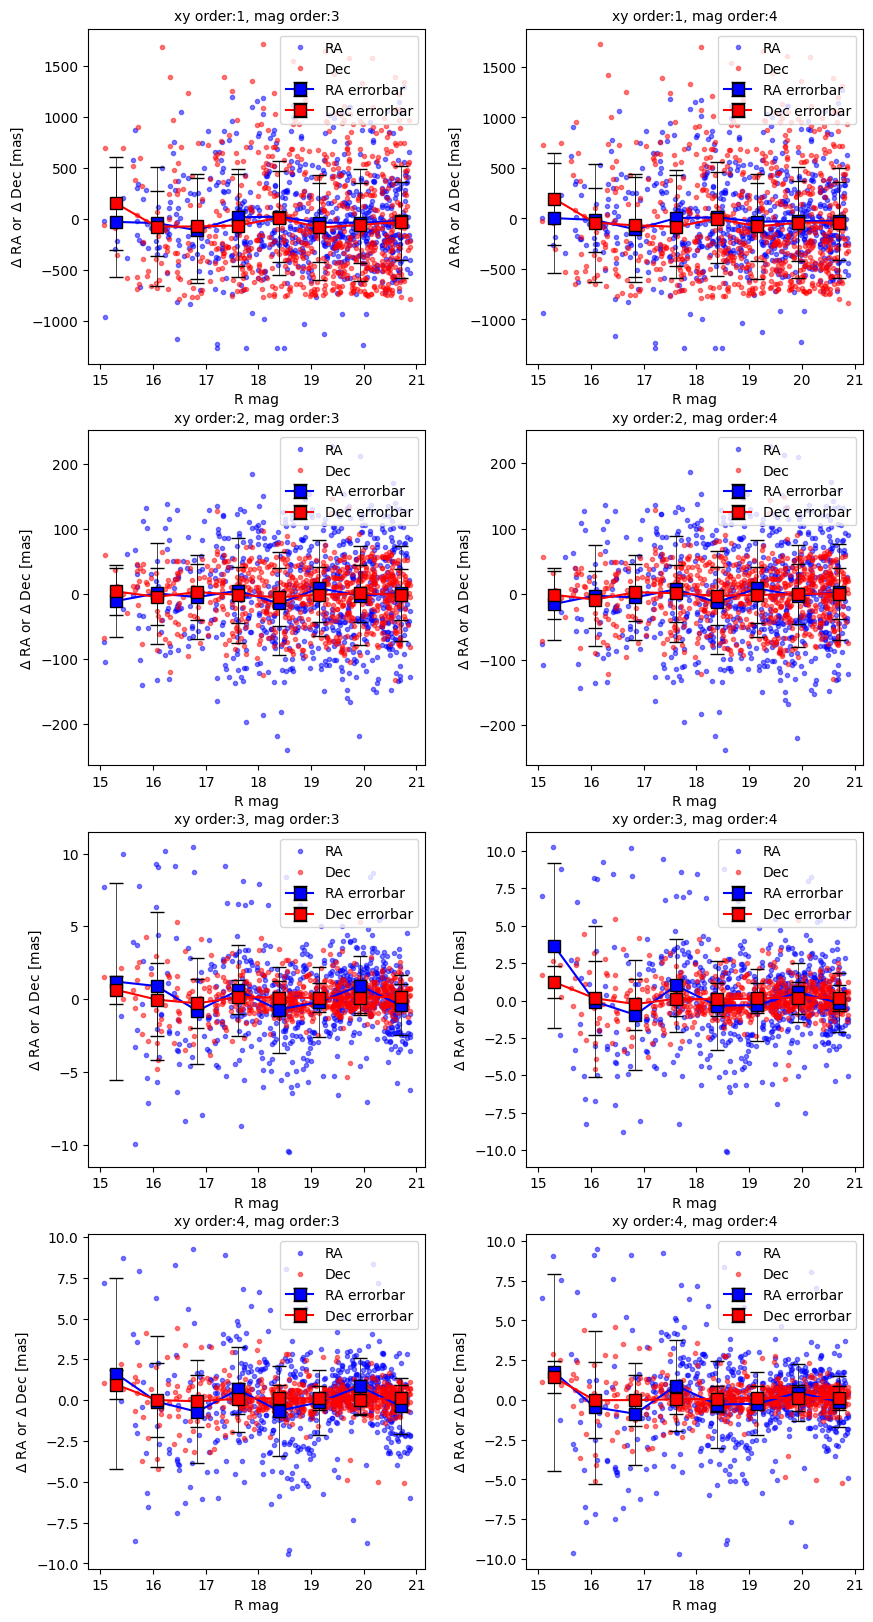

In [62]:
cof_xy_list = [1, 2, 3 ,4]
cof_mag_list = [3, 4]

fig, axes = plt.subplots(4, 2, figsize= (5 * 2, 5 * 4))

for i in range(0, 4):
    for j in range(0, 2):

        with open(f'../match_res/match_{band_short}_{unkonw_index}_{exp_time}_{cof_xy_list[i]}_{cof_mag_list[j]}.pkl', 'rb') as f:
            data = pickle.load(f)

        match_x = data["X_IMAGE"]
        match_y = data["Y_IMAGE"]
        match_mag = data["MAG"]
        dis_ra = data["DIS_RA"]
        dis_dec = data["DIS_DEC"]
        dis_xi = data["DIS_XI"]
        dis_eta = data["DIS_ETA"]

        match_mag_box = match_mag
        match_x_box = match_x
        match_y_box = match_y
        dis_ra_box = dis_ra
        dis_dec_box = dis_dec

        dis_ra_box, dis_dec_box, match_mag_box, filter = function.sigma_filter_2(dis_ra_box, dis_dec_box, match_mag_box, 3)
        index_mag = (match_mag_box < 29) & (match_mag_box > 15)

        dis_ra_box = dis_ra_box[index_mag]
        dis_dec_box = dis_dec_box[index_mag]
        match_mag_box = match_mag_box[index_mag]

        bin_centers_mag_box, bins_mean_dis_ra_box, bins_std_dis_ra_box = bins_divide(match_mag_box, dis_ra_box, 8)
        bin_centers_mag_box, bins_mean_dis_dec_box, bins_std_dis_dec_box = bins_divide(match_mag_box, dis_dec_box, 8)

        axe = axes[i][j]
        axe.plot(match_mag_box, dis_ra_box, '.', c='blue', label="RA", alpha = 0.5)
        axe.plot(match_mag_box, dis_dec_box, '.', c='red', label="Dec", alpha = 0.5)
        axe.errorbar(bin_centers_mag_box, bins_mean_dis_ra_box, yerr=bins_std_dis_ra_box, ecolor='k',elinewidth=0.5,marker='s',mfc='blue',mec='k',mew=1,ms=8,alpha=1,capsize=5,capthick=3,color="blue",label="RA errorbar")
        axe.errorbar(bin_centers_mag_box, bins_mean_dis_dec_box, yerr=bins_std_dis_dec_box, ecolor='k',elinewidth=0.5,marker='s',mfc='red',mec='k',mew=1,ms=8,alpha=1,capsize=5,capthick=3,color="red",label="Dec errorbar")

        axe.set_xlabel(f"{band_short_capital} mag")
        axe.set_ylabel(r"$\Delta$ RA or $\Delta$ Dec [mas]")
        axe.set_title(f"xy order:{cof_xy_list[i]}, mag order:{cof_mag_list[j]}", fontsize=10)
        axe.legend(loc=1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

In [63]:
cof_xy_list = [1, 2, 3 ,4, 5, 6]
cof_mag_list = [1, 2, 3, 4]
len_xy = len(cof_xy_list)

# fig, axes = plt.subplots(4, 4, figsize= (5 * 4, 5 * 4))

magx_list = []
magy_list = []
for mag in range(0, 4):
    x_list = []
    y_list = []
    for xy in range(0, len_xy):

        with open(f'../match_res/match_{band_short}_{unkonw_index}_{exp_time}_{cof_xy_list[xy]}_{cof_mag_list[mag]}.pkl', 'rb') as f:
            data = pickle.load(f)

        match_x = data["X_IMAGE"]
        match_y = data["Y_IMAGE"]
        match_mag = data["MAG"]
        dis_ra = data["DIS_RA"]
        dis_dec = data["DIS_DEC"]
        dis_xi = data["DIS_XI"]
        dis_eta = data["DIS_ETA"]

        match_mag_box = match_mag
        match_x_box = match_x
        match_y_box = match_y
        dis_ra_box = dis_ra
        dis_dec_box = dis_dec

        dis_ra_box, dis_dec_box, match_mag_box, filter = function.sigma_filter_2(dis_ra_box, dis_dec_box, match_mag_box, 3)
        index_mag = (match_mag_box < 29) & (match_mag_box > 15)

        dis_ra_box = dis_ra_box[index_mag]
        dis_dec_box = dis_dec_box[index_mag]
        match_mag_box = match_mag_box[index_mag]

        bin_centers_mag_box, bins_mean_dis_ra_box, bins_std_dis_ra_box = bins_divide(match_mag_box, dis_ra_box, 8)
        bin_centers_mag_box, bins_mean_dis_dec_box, bins_std_dis_dec_box = bins_divide(match_mag_box, dis_dec_box, 8)

        x_list.append(np.sum(np.abs(bins_mean_dis_ra_box)))
        y_list.append(np.sum(np.abs(bins_mean_dis_dec_box)))

    magx_list.append(x_list)
    magy_list.append(y_list)
        # axe = axes[i][j]
        # axe.plot(match_mag_box, dis_ra_box, '.', c='blue', label="RA", alpha = 0.5)
        # axe.plot(match_mag_box, dis_dec_box, '.', c='red', label="Dec", alpha = 0.5)
        # axe.errorbar(bin_centers_mag_box, bins_mean_dis_ra_box, yerr=bins_std_dis_ra_box, ecolor='k',elinewidth=0.5,marker='s',mfc='blue',mec='k',mew=1,ms=8,alpha=1,capsize=5,capthick=3,color="blue",label="RA errorbar")
        # axe.errorbar(bin_centers_mag_box, bins_mean_dis_dec_box, yerr=bins_std_dis_dec_box, ecolor='k',elinewidth=0.5,marker='s',mfc='red',mec='k',mew=1,ms=8,alpha=1,capsize=5,capthick=3,color="red",label="Dec errorbar")

        # axe.set_xlabel(f"{band_short_capital} mag")
        # axe.set_ylabel(r"$\Delta$ RA or $\Delta$ Dec [mas]")
        # axe.set_title(f"xy order:{cof_xy_list[i]}, mag order:{cof_mag_list[j]}", fontsize=10)
        # axe.legend()


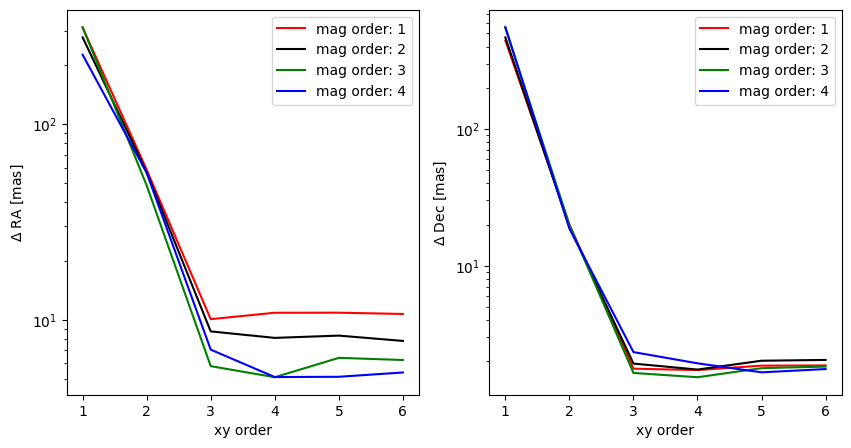

In [64]:
fig, axes = plt.subplots(1, 2, figsize= (5 * 2, 5 * 1))
colors = ["red", "k", "g", "b", "y", "orange"]
for i in range(4):
    axes[0].plot(range(1, len_xy + 1), magx_list[i], label=f"mag order: {i + 1}", c=colors[i])
    axes[1].plot(range(1, len_xy + 1), magy_list[i], label=f"mag order: {i + 1}", c=colors[i])

axes[0].set_xlabel(f"xy order")
axes[0].set_ylabel(r"$\Delta$ RA [mas]")
axes[1].set_xlabel(f"xy order")
axes[1].set_ylabel(r"$\Delta$ Dec [mas]")
axes[0].set_xticks(cof_xy_list)
axes[1].set_xticks(cof_xy_list)
axes[0].set_yscale("log")
axes[1].set_yscale("log")
axes[0].legend()
axes[1].legend()